<a href="https://colab.research.google.com/github/lblogan14/python_data_analysis/blob/master/Chapter14_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive') #add drive content to the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
'''Locate the directory which has the dataset'''
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/Python_Data_Analysis/data

/content/drive/My Drive/Colab Notebooks/Python_Data_Analysis/data


#Image Analysis and Computer VIsion

##OpenCV and Python
*OpenCV - Open Source Computer VIsion* (https://opencv.org)

    conda install opencv

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Load and Display an Image
**imread()** function

In [5]:
img = cv2.imread('italy2018.jpg')
img

array([[[ 38,  43,  11],
        [ 37,  42,  10],
        [ 36,  41,   9],
        ...,
        [ 24,  37,  15],
        [ 22,  36,  12],
        [ 23,  36,  12]],

       [[ 39,  45,  10],
        [ 37,  43,   8],
        [ 36,  42,   7],
        ...,
        [ 24,  37,  15],
        [ 22,  35,  13],
        [ 23,  36,  12]],

       [[ 39,  45,  10],
        [ 38,  44,   9],
        [ 36,  42,   7],
        ...,
        [ 24,  37,  15],
        [ 22,  35,  13],
        [ 23,  35,  13]],

       ...,

       [[170, 190, 185],
        [140, 183, 168],
        [117, 188, 161],
        ...,
        [189, 194, 209],
        [111, 112, 240],
        [ 85,  75, 241]],

       [[166, 185, 182],
        [135, 178, 165],
        [112, 186, 158],
        ...,
        [190, 195, 210],
        [114, 115, 243],
        [ 90,  80, 246]],

       [[148, 166, 165],
        [111, 154, 143],
        [ 91, 163, 140],
        ...,
        [191, 196, 211],
        [117, 118, 246],
        [ 96,  86, 252]]

**imshow()** method to create a window withe the image loaded in the variable **img**

This method take two parameters: window name and the image variable.

Once you have created the window, you can se the **waitKey()** method

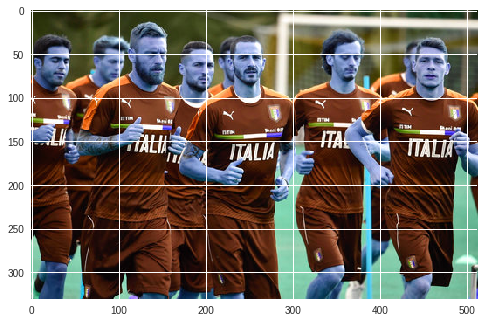

In [6]:
#cv2.imshow('Image', img)
#cv2.waiitKey()
plt.imshow(img)

The **waitKey()** method starts to display the window and allows you to control the waiting time of the program before continuing with the next command. This example used **0** as an argument, which means that the wait will be infinite as long as you press any key on the keyboard.

In [0]:
cv2.imshow('Image', img)
cv2.waitKey(2000) #in milliseconds
cv2.destroyWindow('Image')

Or you can use **destroyAllWindows()** method.

#Working with Images
After loading the image, decompose it into three RGB channels with **split()** method

In [0]:
b,r,g = cv2.split(img)

Reassemble the three channels with different order using the **merge()** method

In [0]:
img2 = cv2.merge((g,r,b))

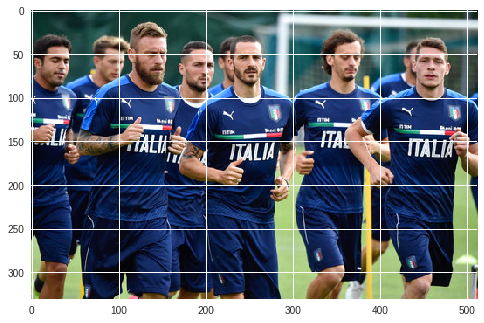

In [17]:
plt.imshow(img2)

#Save the New Image
**imwrite()** method

In [18]:
cv2.imwrite('italy2018altered.png', img2)

True

#Elementary Operations on Images
Addition of two iamges using **cv2.add()** function

Note: the two images must have the same dimensions.

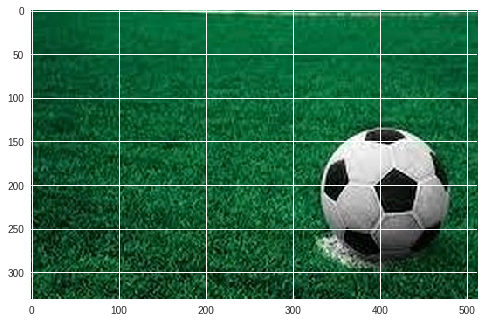

In [19]:
img2 = cv2.imread('soccer.jpg')
plt.imshow(img2)

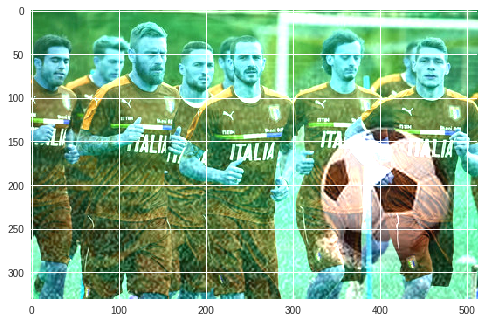

In [20]:
img_sum = cv2.add(img, img2)
plt.imshow(img_sum)

**subtract()** function

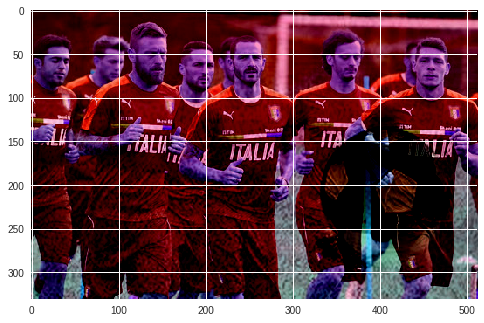

In [21]:
img_sub = cv2.subtract(img, img2)
plt.imshow(img_sub)

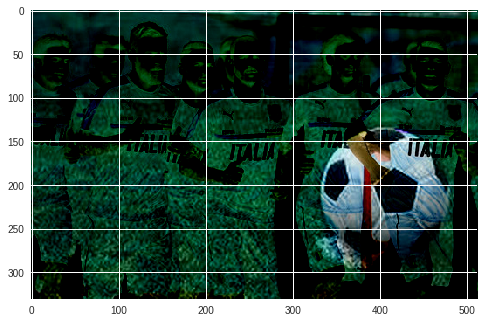

In [22]:
img_sub = cv2.subtract(img2, img)
plt.imshow(img_sub)

**cv2.add()** and **cv2.subtract()** maintain the values between 0 and 255, regardless of the value of the operators.

Since the images are matrices, you can use NumPy operations to see the difference

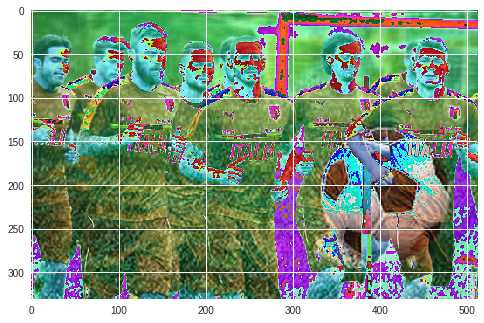

In [23]:
img3 = img + img2 # NumPy addition operation
plt.imshow(img3)

#Image Blending
The blending operation:

$img = \alpha * img1 + (1-\alpha) * img2 $     $with 0<=\alpha<=1$

**cv2.addWeighted()** function

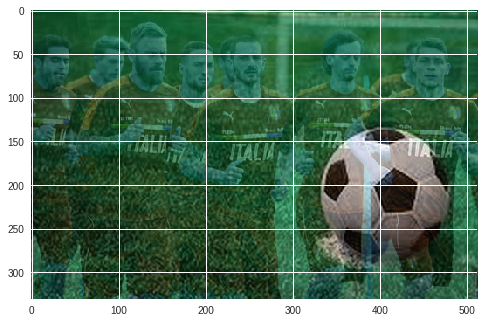

In [24]:
img3 = cv2.addWeighted(img, 0.3, img2, 0.7, 0)
plt.imshow(img3)

#Image Analysis
Images filters for Edge Detection:
* **sobel**
* **laplacian**

In [0]:
img = cv2.imread('blackandwhite.jpg', 0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

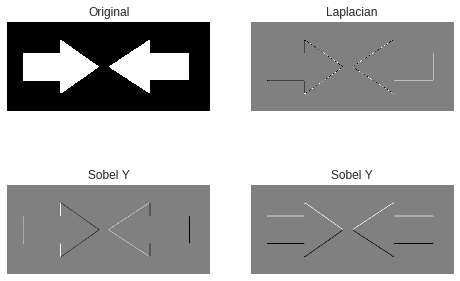

In [26]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

If you are interested in only detecting edges, set as output an image file in **cv2.CV_8U**

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

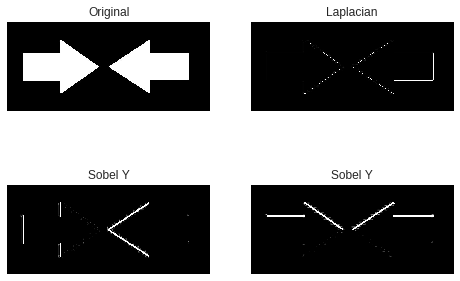

In [27]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

But if you look carefully at the panels of the Sobel filter X and Y, you will notice right away that something is wrong. Some edges are missing....

In fact, there was a problem while converting the data. The gradients reported in the grayscale with **cv2.CV_64F** values are represented by positive values (positive slope) when changing from black to white. However, they are represented by negative values (negative slope) when switching from white to black. In the conversion from **cv2.CV_64F** to **cv2.CV_8U**, all negative slopes are reduced to 0, and then the information relating to those edges is lost. When the program will display the image, the edges from white to black will not be shown.

To overcome this, you should keep the data in the output of the filter in **cv2.CV_64F** (instead of **cv2.CV_8U**), then calculate the absolute value, and finally do the conversion in **cv2.CV_8U**.

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

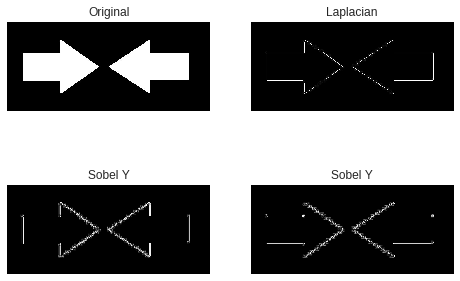

In [28]:
#solve the conversion issue
laplacian64 = cv2.Laplacian(img, cv2.CV_64F)
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

The Laplacian and Sobel filters are also able to detect the level of gradients across a grayscale.

(Text(0.5,1,'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

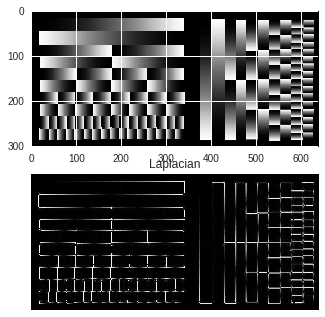

In [30]:
img = cv2.imread('gradients.jpg',0)

laplacian64 = cv2.Laplacian(img, cv2.CV_64F)
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

#A Deep Learning Example: The Face Detection

When you want to use a deep neural network module with Caffe models in the OpenCV environment, you need two types of files, as follows:
* A **prototxt** file, which defines the model architecture (i.e., the layers
themselves). You will use a **deploy.prototxt.txt** file downloaded
from the web (https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt).
* A **caffemodel** file, which contains the weights
for the actual layers in the deep neural network. This file is the
most important because it contains all the “learning” of that neural
network to perform a given task. For your purposes, a caffemodel file
is available at https://github.com/opencv/opencv_3rdparty/tree/dnn_samples_face_detector_20170830.

OpenCV has the **dnn*** module, which specializes in these kinds of operations.

To load a learned neural network you can use the **dnn.readNetFromCaffe()** function.

In [0]:
net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

In [0]:
image = cv2.imread('italy2018.jpg')
(h,w) = image.shape[:2]

**dnn.blobFromImage()** pre-processes the image to be adapted to neural networks. 

For example, resize the image to 300x300 pixels so that it can be used by the caffemodel file that has been trained for images of this size.

In [0]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))

Define a confidence threshold with an optimal value of 0.5

In [0]:
confidence_threshold = 0.5

Time for detection test

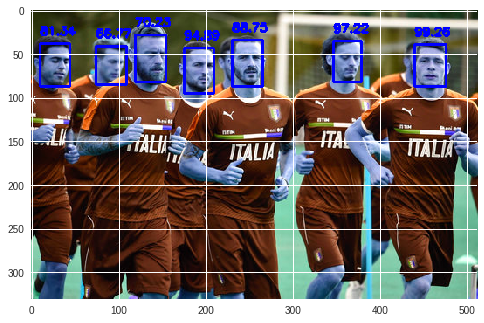

In [37]:
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
  confidence = detections[0,0,i,2]
  if confidence > confidence_threshold:
    box = detections[0,0,i,3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype('int')
    text = '{:.2f}'.format(confidence*100)
    y = startY - 10 if startY -10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 2)
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255), 2)

plt.imshow(image)